# Práctica 1

###### Alumno: Daniel Alconchel Vázquez

Comenzamos importando los módulos de Pyhton necesarios:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sympy as sp

In [3]:
from numpy import sign

In [4]:
from decimal import *

## Ejercicio 1

1.- Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

Para demostrar que $x^3+4x^2=10$ tiene solución única en el intervalo $[1,2]$, definimos la siguiente función

$$f:[1,2] \rightarrow \mathbb{R},\;\;\;\;f(x)=x^3+4x-10\;\forall x \in [1,2]$$

Se puede apreciar, que resolver la ecuación del enunciado es equivalente a ver las raíces de f. Usaremos el teorema de Bolzano para ver que tiene una única raíz en $[1,2]$. Para ello, evaluamos la función en los extremos:

In [5]:
x = sp.Symbol('x')
def f0(x):
    return x**3+4*x-10
funciones = [f0]

In [6]:
f0(1), f0(2)

(-5, 6)

Podemos observar que $f(1)f(2)<0$, por lo que f tiene, al menos, una raíz en $[1,2]$. Para ver que es única, podemos ver que la función de f es creciente en $[1,2]$. Esto podemos apreciarlo calculando la derivada y observando el signo de la misma en el intervalo.

$$f'(x)=3x^2+4>0\; \forall x\in [1,2]$$

Ahora, aproximaremos dicha raíz con el método de bisección

In [7]:
def biseccion(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        c = (a+b)/2
        if abs(f(c)) < prec:
            exit = 'precisión'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            exit = 'tolerancia'
            break
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    
    return c

Aproximaremos dicha raíz con el método de bisección con al menos 3 cifras decimales exactas, es decir, con una precisión de $10^{-3}$

In [8]:
biseccion(f0,1,2,prec=10**(-3))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5567626953125
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 13


1.5567626953125

Vamos a definir ahora un método que nos calcule la solución exacta, para ver que es correcta

In [9]:
def solucion_exacta(f, a=-sp.oo, b=sp.oo, cifras=None):
    """
    Encontrar la raíz exacta de f en un intervalo [a,b]
    
    Importante: es necesario que haya una única raíz en el intervalo.
    En caso contrario, se retornará una de ellas.
    
    En caso de que no haya raíces en el intervalo o sympy no pueda
    encontrar la raíz se retornará None
    
    Si no se especifica en un intervalo, se tomará (-oo,+oo)
    
    Parameters
    ----------
    f : function
        Función de la que encontrar la raíz
    a: float
        Extremo inferior
    b: float
        Extremo superior
        
    Return
    ------
    """
    
    x = sp.Symbol('x')
    try:
        sol_exact = sp.solve(f(x), x)
    except:
        sol_exact = []
    
    for sol in sol_exact:
        if sol.is_real:
            if sol >= a and sol <= b:
                print("Solución exacta en decimal:", sol.evalf())
                if cifras:
                    print("Solución exacta con", cifras, "cifras significativas:", sol.evalf(n=cifras+1))
                return sol
    
    print("sympy no ha podido encontrar la solución exacta")


In [10]:
solucion_exacta(f0, 1, 2, cifras=3)

Solución exacta en decimal: 1.55677326439421
Solución exacta con 3 cifras significativas: 1.557


-4/(3*(5 + sqrt(2217)/9)**(1/3)) + (5 + sqrt(2217)/9)**(1/3)

Observemos que, para conseguir 3 cifras exactas, se han necesitado 13 iteraciones. Podemos hacer una predicción del número de iteraciones que necesitaremos para conseguir una precisión de 5 cifras. Para ello, sabemos que la cota de error de la bisección es de

$$|e_n|=|x_n-s| \leq \frac{1}{2^{n-1}}(b-a)$$

Despejando obtenemos que, para conseguir $5$ cifras decimales exactas, debe ser $|e_n|<10^{-5}$, de donde obtenemos que $n\leq 17 \implies$ Se necesitan 17 iteraciones para alcanzar dicha precisión.

Veamos que es cierto:

In [11]:
biseccion(f0, 1, 2, prec=10**(-5))

maxiter=100, tol=1e-05, prec=1e-05, cifras=5
Se ha alcanzado la máxima tolerancia
Aproximación de la solución: 1.55677032470703125
Aproximación de la solución con 5 cifras significativas: 1.55677
Número de iteraciones: 17


1.5567703247070312

In [12]:
solucion_exacta(f0, 1, 2, cifras=5)

Solución exacta en decimal: 1.55677326439421
Solución exacta con 5 cifras significativas: 1.55677


-4/(3*(5 + sqrt(2217)/9)**(1/3)) + (5 + sqrt(2217)/9)**(1/3)

Ahora, implementaremos el algoritmo de Newton-Raphson, el cual, usaremos para resolver la ecuación, de forma que el error entre dos aproximaciones consecutivas sea inferior a $10^{-3}$

In [13]:
def newton_raphson(f, df, x0, a=-sp.oo, b=sp.oo, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - f(x0)/df(x0)
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return x1

In [14]:
sp.diff(x**3+4*x-10, x)

3*x**2 + 4

In [15]:
def df0(x):
    return 3*x**2+4

In [16]:
newton_raphson(f0, df0, 1.5, prec=10**(-3))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5567740374915424172996836205129511654376983642578125
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 2


1.5567740374915424

## Ejercicio 2

2.-Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos ($tol=10^{-2}$), usando el algoritmo de bisección.

Para este ejercicio, podremos reutilizar el algoritmo de Bisección del apartado anterior.
Notemos que para encontrar la raíz cúbica de 25, basta con encontrar la raiz de la función
$$f(x)=x^3-25$$

Usando el Teorema de Bolzano, vemos que hay una raíz en el intervalo $[2,3]$. Además, podemos ver que la función es monótonamente creciente en dicho intervalo (basta con ver que el signo de la derivada es siempre positivo), lo cual nos garantiza que la raíz es única. Ahora procederemos a aplicar bisección en $[2,3]$ para obtener dos cifras decimales exactas.

In [17]:
def f1(x):
    return x**3-25
funciones.append(f1)

In [18]:
biseccion(f1,2,3,cifras=2)

maxiter=100, tol=1e-05, prec=0.001, cifras=2
Se ha alcanzado la precisión deseada
Aproximación de la solución: 2.92401123046875
Aproximación de la solución con 2 cifras significativas: 2.92
Número de iteraciones: 14


2.92401123046875

In [19]:
solucion_exacta(f1,2,3,cifras=2)

Solución exacta en decimal: 2.92401773821287
Solución exacta con 2 cifras significativas: 2.92


5**(2/3)

## Ejercicio 3

3.-Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$, partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

Comenzamos con la ecuación $x^3-x-1 = 0$ en $[1,2]$. Encontrar su solución equivale a hallar las raices de la función

$$f(x) = x^3-x-1$$

en dicho intervalo. Para ello, aplicaremos el método de Newton-Rhapson definido en ejercicios anteriores, partiendo con $x_0 = 1.3$, en el intervalo $[1,2]$.

In [20]:
def f2(x):
    return x**3-x-1
funciones.append(f2)

In [21]:
sp.diff(x**3-x-1, x)

3*x**2 - 1

In [22]:
def df2(x):
    return 3*x**2-1

In [23]:
newton_raphson(f2, df2, 0, 1, 2, tol=10**(-5))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.3247187886152571589803983442834578454494476318359375
Aproximación de la solución con 3 cifras significativas: 1.325
Número de iteraciones: 20


1.3247187886152572

In [24]:
solucion_exacta(f2, 1, 2)

Solución exacta en decimal: 1.32471795724475


1/(3*(sqrt(69)/18 + 1/2)**(1/3)) + (sqrt(69)/18 + 1/2)**(1/3)

Procedemos de la misma forma para la siguiente función, que es $3x = 2+x^2-e^x$. Para ello, estudiaremos las raíces de 

$$f(x) = 3x-2-x^2+e^x$$

partiendo de $x_0=0$, sin que se nos especifique un intervalo.

In [25]:
def f3(x):
    return 3*x-2-x**2+np.exp(x)
funciones.append(f3)

In [26]:
sp.diff(3*x-2-x**2+sp.exp(x),x)

-2*x + exp(x) + 3

In [27]:
def df3(x):
    return -2*x+np.exp(x)+3

In [28]:
newton_raphson(f3, df3, 0, tol=10**(-5))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 0.257524945045739972471210421645082533359527587890625
Aproximación de la solución con 3 cifras significativas: 0.258
Número de iteraciones: 2


0.25752494504574

Por último, vamos con $x^2+10cos(x)+x=0$, nuevamente, sin especificar un intervalo, luego, estudiaremos las raíces de 

$$f(x) = x^2+10cos(x)+x$$

partiendo de $x_0=-1$, sin especificar el intervalo.

In [29]:
def f4(x):
    return x**2+10*np.cos(x)+x
funciones.append(f4)

In [30]:
sp.diff(x**2+10*sp.cos(x)+x, x)

2*x - 10*sin(x) + 1

In [31]:
def df4(x):
    return 2*x-10*np.sin(x)+1

In [32]:
newton_raphson(f4, df4, -1, tol=10**(-5))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: -1.6869398658093508469590915410663001239299774169921875
Aproximación de la solución con 3 cifras significativas: -1.687
Número de iteraciones: 3


-1.6869398658093508

## Ejercicio 4

4.- Para la función  $ f(x)= 3 x^2+e^x-1$, 

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas. 

Para el primer apartado continuamos procediendo como hasta el momento.

In [33]:
def f5(x):
    return 3*x**2+np.exp(x)-1
funciones.append(f5)

In [34]:
biseccion(f5, 0, 1, prec=10**(-5), cifras=4)

maxiter=100, tol=1e-05, prec=1e-05, cifras=4
Se ha alcanzado la precisión deseada
Aproximación de la solución: 0.00000762939453125
Aproximación de la solución con 4 cifras significativas: 0.0000
Número de iteraciones: 17


7.62939453125e-06

Para el segundo apartado podemos, también, proceder como anteriormente.

In [35]:
sp.diff(3*x**2+sp.exp(x)-1, x)

6*x + exp(x)

In [36]:
def df5(x):
    return 6*x+np.exp(x)

In [37]:
newton_raphson(f5, df5, 0, 0, 1, tol=10**(-4))

maxiter=100, tol=0.0001, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 0
Aproximación de la solución con 3 cifras significativas: 0.000
Número de iteraciones: 1


0.0

## Ejercicio 5

5.- Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

i) $f(x)=x^7-x^4+2$ ,

ii) $f(x)=x^7+\cos  x-3$.

El paquete **sympy** tiene una función para encontrar la solución exacta a una ecuación de la forma $f(x)=0$. Anteriormente, hemos implementado una versión que encuentra las soluciones en un intervalo en que sepamos que hay una raíz única.

Aprovechando esta función anteriormente implementada, es fácil ver que $f(x) = x^7-x^4+2$ tiene una única raíz en $\mathbb{R}$. Por tanto, basta con:

In [38]:
def f6(x):
    return x**7-x**4+2
funciones.append(f6)

In [39]:
solucion_exacta(f6)

Solución exacta en decimal: -1.00000000000000


-1

Por lo tanto, la raíz es $-1$.

Si procedemos del mismo modo con la siguiente función nos encontramos un problema.

In [40]:
def f7(x):
    return x**7+sp.cos(x)-3
funciones.append(f7)

In [41]:
solucion_exacta(f7)

sympy no ha podido encontrar la solución exacta


En la función que hemos implementado, tenemos un bloque ***try ... except***, que evita mostrar el error completo. Si realizamos **sp.solve** manualmente, vemos que sympy no tiene implementado métodos para resolver este tipo de ecuaciones.

In [42]:
# sp.solve(f7(x),x) --> Ejecutar para ver error

Como no podemos resolverlo simbólicamente, usaremos un resolvedor numérico que trae implementado el paquete sympy y veremos que aproximación obtenemos:

In [43]:
aprox = sp.nsolve(f7(x), x, 1)
aprox

1.14545980727001

Para comprobar esta aproximación, mostraremos la gráfoca de la función en un entorno cercano a ese punto

Text(0.5, 1.0, 'Entorno de la raíz de f')

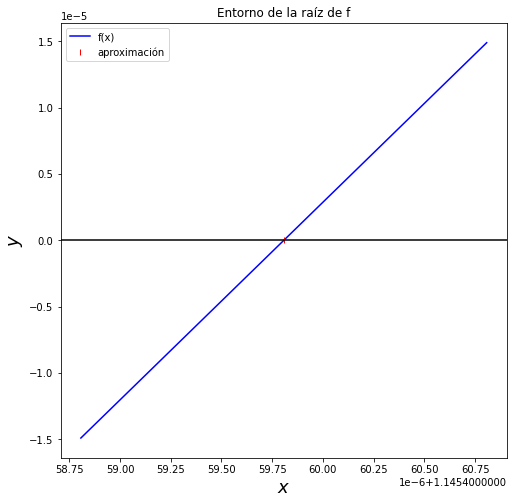

In [44]:
nxx = 100;
a = float(aprox) - 10**(-6); b = float(aprox) + 10**(-6)
xx = np.linspace(a,b,nxx)
yy = xx**7+np.cos(xx)-3
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(xx,yy,'b',label='f(x)')
ax.plot(float(aprox),0,'r|', label='aproximación')
ax.axhline(y=0, color='k')
ax.legend(loc='upper left')
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('Entorno de la raíz de f')

Por lo que podemos ver que la aproximación es bastante buena.

## Ejercicio 6

6.- Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

Vamos a comenzar programando los diferentes métodos que necesitamos (insertando los elementos en un vector de iteraciones), los cuales son:

    - biseccion_iters: Método de bisección
    
    - regular_falsi_iters: Método de Regula-Falsi
    
    - secante_iters: Método de la secante
    
    - newton_raphson_iters: Método de Newton-Raphson
    
    - wittaker_iters: Método de Whittaker
    
    - steffensen_iters: Método de Steffensen

In [45]:
def biseccion_iters(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    iters = []
    
    niter = 0
    while niter < maxiter:
        c = (a+b)/2
        iters.append(c)
        
        if abs(f(c)) < prec:
            exit = 'precisión'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            exit = 'tolerancia'
            break
        
        niter += 1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [46]:
def regula_falsi_iters(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    iters = []
    
    niter = 0
    while niter < maxiter:
        c = b - ((a-b)*f(b))/(f(a)-f(b))
        iters.append(c)
        
        if abs(f(c)) < prec:
            exit = 'precisión'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            exit = 'tolerancia'
            break
        
        niter += 1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [47]:
def secante_iters(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    iters = []
    
    niter = 0
    x0 = a; x1 = b
    
    while niter < maxiter:
        niter = niter + 1;
        c = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        iters.append(c)
        
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        else:
            x1,x0 = c,x1
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [48]:
def newton_raphson_iters(f, df, x0, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    iters = [x0]
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - f(x0)/df(x0)
        iters.append(x1)
        
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [49]:
def whittaker_iters(f, m, x0, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    iters = [x0]
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - f(x0)/m
        iters.append(x1)
        
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [50]:
def steffensen_iters(f, df, x0, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    iters = [x0]
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - f(x0)**2/(f(x0+f(x0))-f(x0))
        iters.append(x1)
        
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

A continuación, programaremos la aceleración de Aitken. Dada una sucesión de iteraciones, $\{x_n\}_{n\geq 0}$, construiremos la sucesión acelerada $\{\hat{x}_{n}\}_{n\geq 0}$ como

$$\hat{x}_n = x_n-\frac{(\Delta x_n)^2}{\Delta^2 x_n} = x_n-\frac{(x_{n+1}-x_n)^2}{x_{n+2}-2x_{n+1}+x_n}$$

In [51]:
def aceleracion_aitken(iters):
    iters_a = []
    for n in range(len(iters)-2):
        iters_a.append(iters[n]-(iters[n+1]-iters[n])**2/(iters[n+2]-2*iters[n+1]+iters[n]))

    return iters_a

Finalmente, programaremos la aceleración de Stefensen. Tomaremos la tolerancia como criterio de parada.

In [52]:
def aceleracion_steffensen(f, iters, tol=10**(-5)):
    g = lambda x: x - f(x)
    
    st = [1]
    x0, x1 = 0, 1
    
    while (abs(x1 - x0) >= tol):    
        v0 = iters[0]-(iters[1]-iters[0])**2/(iters[2]-2*iters[1]+iters[0])
        v1 = g(v0)
        v2 = g(v1)
        st.append(v0)
        iters = [v0, v1, v2]
        
        x1 = st[-1]; x0 = st[-2]
    
    return st[1:]

Vamos a realizar las comparaciones sobre alguna de las funciones que hemos tenido anteriormente. Por ejemplo, f0, que está definida en el ejercicio 1:
$$f(x)=x^2+4x-10$$

In [53]:
f0,df0

(<function __main__.f0(x)>, <function __main__.df0(x)>)

Recordemos que f sólo tiene una raíz en $\mathbb{R}$, que se encuentra en $[1,2]$. Por tanto, podemos aplicar bisección, Regula-Falsi y el método de la secante, en dicho intervalo. Además, se puede demostrar que el método de Newton-Raphson converge a la solución en este intervalo para cualquier $x_0$ inicial. Tomaremos $x_0=1.3$. También, tomaremos este $x_0$ para Whittaker y Steffensen. Tomaremos $m=f'(x_0)$ para Whittaker.

In [54]:
a = 1; b = 2; x0 = 1.3; m = df0(x0)

iters = []
print("[Bisección]")
iters.append(biseccion_iters(f0, a, b))
print("[Regula-Falsi]")
iters.append(regula_falsi_iters(f0, a, b))
print("[Secante]")
iters.append(secante_iters(f0, a, b))
print("[Newton-Raphson]")
iters.append(newton_raphson_iters(f0, df0, x0))
print("[Whittaker]")
iters.append(whittaker_iters(f0, m, x0))
print("[Steffensen]")
iters.append(steffensen_iters(f0, df0, x0))

[Bisección]
maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5567626953125
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 12
[Regula-Falsi]
maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5566911363236892729133842294686473906040191650390625
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 4
[Secante]
maxiter=100, tol=1e-05, prec=0.001, cifras=3
Aproximación de la solución: 1.556767783245746716858093350310809910297393798828125
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 4
[Newton-Raphson]
maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5567733222841038109862665805849246680736541748046875
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 3
[Whitt

In [55]:
iters

[[1.5,
  1.75,
  1.625,
  1.5625,
  1.53125,
  1.546875,
  1.5546875,
  1.55859375,
  1.556640625,
  1.5576171875,
  1.55712890625,
  1.556884765625,
  1.5567626953125],
 [1.4545454545454546,
  1.5393401015228427,
  1.5538452345212188,
  1.5562827746246575,
  1.5566911363236893],
 [1.4545454545454546,
  1.5393401015228427,
  1.5575294878392076,
  1.5567677832457467],
 [1.3, 1.5869900771775083, 1.5571470603935478, 1.5567733222841038],
 [1.3,
  1.5869900771775083,
  1.548968650690248,
  1.5586355638509501,
  1.5563196332977893,
  1.556883221700839,
  1.556746579531478],
 [1.3,
  1.7571551810891253,
  1.680993828205968,
  1.614245835479416,
  1.5713647287260548,
  1.5578195890347042,
  1.5567788178259172]]

Ahora aplicaremos los procesos de aceleración de Aitken y de Steffensen a cada una de las sucesiones obtenidas en el método anterior.

In [56]:
iters_aitken = []
iters_steffensen = []
for it in iters:
    iters_aitken.append(aceleracion_aitken(it))
    iters_steffensen.append(aceleracion_steffensen(f0, it))

valor_exacto = solucion_exacta(f0).evalf()

Solución exacta en decimal: 1.55677326439421


Para comparar, compararemos que el error de las iteraciones del algoritmo principal con los de aceleraciones de Aitken y Steffensen, así como el número de la última iteración (n), para cada uno de los algoritmos anteriores.

In [57]:
row = ["Algoritmo", "Error algoritmo", "n", "Error Aitken", "n", "Error Steffensen", "n"]
print("{: <14} {: >26} {: >5} {: >26} {: >5} {: >26} {: >5}".format(*row))
print("-------------- -------------------------- ----- -------------------------- ----- -------------------------- -----")

algoritmos = ["Bisección", "Regula-Falsi", "Secante", "Newton-Raphson", "Whittaker", "Steffensen"]

for i in range(len(algoritmos)):
    row = [algoritmos[i]]
    
    # error algoritmo
    n = len(iters[i])
    val = iters[i][n-1]
    row.append(abs(val-valor_exacto))
    row.append(n)
    
    # error Aitken
    n = len(iters_aitken[i])
    val = iters_aitken[i][n-1]
    row.append(abs(val-valor_exacto))
    row.append(n)
    
    # error Steffensen
    n = len(iters_steffensen[i])
    val = iters_steffensen[i][n-1]
    row.append(abs(val-valor_exacto))
    row.append(n)
    
    print("{: <14} {: >26} {: >5} {: >26} {: >5} {: >26} {: >5}".format(*row))

Algoritmo                 Error algoritmo     n               Error Aitken     n           Error Steffensen     n
-------------- -------------------------- ----- -------------------------- ----- -------------------------- -----
Bisección           0.0000105690817113757    13       0.000132639394211376    11       3.63780117140777E-11     6
Regula-Falsi        0.0000821280705221028     5        5.26174224191323E-8     3       1.33226762955019E-15     3
Secante            0.00000548114846465886     4      0.0000251341807773198     2       3.06421554796543E-14     4
Newton-Raphson        5.78898924352700E-8     4     0.00000468196736691517     2       2.22044604925031E-16     4
Whittaker           0.0000266848627332728     7        2.06707038152842E-8     5       2.22044604925031E-16     4
Steffensen         0.00000555343170582923     7      0.0000810726710478438     5       6.66133814775094E-16     7


## Ejercicio 7

7.- Programar el método de Newton-Raphson acelerado, partiendo de cierto $x_0$ adecuado: $$x_{n+1}=x_n - m\frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2,\ldots$$ para el caso de una raíz múltiple (de multiplicidad $m\in\mathbb{N}$) de una ecuación del tipo $f(x)=0$ y comparar los resultados
con los que se obtienen mediante el empleo de los métodos de aceleración habituales de Aitken y Steffensen (según los apuntes).

Usaremos como base el método de Newton-Raphson:

In [58]:
def newton_raphson_acelerado(f, df, m, x0, a=-sp.oo, b=sp.oo, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - m*f(x0)/df(x0)
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return x1

Lo usaremos para encontrar la raíz múltiple $\sqrt{2}$, de multiplicidad $m=3$, de la ecuación
$$f(x)=(x-\sqrt{2})^3(x+4)$$

In [59]:
def f8(x):
    return (x-np.sqrt(2))**3*(x+4)

In [60]:
sp.diff((x-sp.sqrt(2))**3*(x+4),x)

3*(x + 4)*(x - sqrt(2))**2 + (x - sqrt(2))**3

In [61]:
def df8(x):
    return 3*(x+4)*(x-np.sqrt(2))**2+(x-np.sqrt(2))**3

In [62]:
valor_exacto = solucion_exacta(f8, 0, 2)
valor_exacto

Solución exacta en decimal: 1.41421356237310


1.41421356237310

Pondremos $x_0=25$, por ejemplo, para tener más iteraciones, pues converge muy rápido.

In [63]:
newton_raphson_acelerado(f8, df8, 3, 25, prec=10**(-4))

maxiter=100, tol=1e-05, prec=0.0001, cifras=4
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.43966471556344810522887200932018458843231201171875
Aproximación de la solución con 4 cifras significativas: 1.4397
Número de iteraciones: 3


1.439664715563448

Compararemos ahora con Aitken y Stefensen. Del mismo modo, crearemos una función que guarde las iteraciones.

In [64]:
def newton_raphson_acelerado_iters(f, df, m, x0, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    iters = [x0]
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - m*f(x0)/df(x0)
        iters.append(x1)
        
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [65]:
iters = newton_raphson_acelerado_iters(f8, df8, 3, 25, prec=10**(-4))

maxiter=100, tol=1e-05, prec=0.0001, cifras=4
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.43966471556344810522887200932018458843231201171875
Aproximación de la solución con 4 cifras significativas: 1.4397
Número de iteraciones: 3


In [66]:
iters

[25, 6.444600737809118, 2.1100848456345567, 1.439664715563448]

In [67]:
iters_aitken = aceleracion_aitken(iters)
iters_steffensen = aceleracion_steffensen(f8, iters, tol=10**(-3))

In [68]:
valor_exacto

1.41421356237310

In [69]:
iters

[25, 6.444600737809118, 2.1100848456345567, 1.439664715563448]

In [70]:
iters_aitken

[0.7889272543187431, 1.3169978476684507]

In [71]:
iters_steffensen

[0.7889272543187431,
 1.4300072104287338,
 1.4247406163133771,
 1.421231754993639,
 1.4188927416107997,
 1.4173332795661917,
 1.416293522960526,
 1.4156002556537108]

## Ejercicio 8

8.- Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo y aplicarlo para aproximar alguna de las raíces reales del siguiente polinomio

$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
(siendo $d_0, d_1, \ldots, d_7$ los dígitos ordenados de su DNI, pasaporte o tarjeta de residente).

Programar y construir también una sucesión de Sturm para dicho polinomio.

Primero, vamos a ver cuál es nuestro polinomio:
$$p(x)=4+9x+6x^2+x^3+7x^4+x^5+9x^7$$

Programaremos el algoritmo de Horner a continuación. Para ello, deberemos extraer los coeficientes del polinomio. Realizaremos una primera aproximación en la que le pasaremos un array de coeficientes, de forma que un polinomio
$$p(x)=a_0+a_1x+a_2x^2+...+a_nx^n$$

que le corresponde el array $a_0,a_1,...,a_n$.
Nuestra primera aproximación del algoritmo tendrá como *input* este array.

In [72]:
def horner_prev(coefs, x0):
    n = len(coefs)
    b = coefs[n-1]
    
    for a in coefs[-2::-1]:
        b = a + b*x0
        
    return b   

In [73]:
def p(x):
    return 4+9*x+6*x**2+x**3+7*x**4+x**5+0*x**6+9*x**7

In [74]:
p_c = [4,9,6,1,7,1,0,9]

In [75]:
all([horner_prev(p_c, x0) == p(x0) for x0 in np.arange(-5,5,0.5)])

True

Sin embargo, resulta un poco tedioso tener que extraer los coeficientes del polinomio a mano, pero podemos hacerlo con *sympy*.

In [76]:
def get_coefs(p):
    x = sp.Symbol('x')
    coefs = sp.Poly(p(x),x).all_coeffs()[::-1]
    return coefs

In [77]:
get_coefs(p)

[4, 9, 6, 1, 7, 1, 0, 9]

Ahora podemos implementar el algoritmo de Horner de forma que le pasemos un polinimio directamente:

In [78]:
def horner(p, x0):
    coefs = get_coefs(p)
    return horner_prev(coefs, x0)

Que usaremos en una nueva implementación de Newton-Raphson, que evalue usando Horner.

In [79]:
def newton_raphson_horner(f, df, x0, a=-sp.oo, b=sp.oo, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - horner(f,x0)/horner(df,x0)
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', float(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(float(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return x1

In [80]:
sp.diff(p(x),x)

63*x**6 + 5*x**4 + 28*x**3 + 3*x**2 + 12*x + 9

In [81]:
def dp(x):
    return 63*x**6+5*x**4+28*x**3+3*x**2+12*x+9

In [82]:
newton_raphson_horner(p, dp, -1)

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: -0.8826187895178279
Aproximación de la solución con 3 cifras significativas: -0.883
Número de iteraciones: 4


-9634414184351783034828280574047556909551435250382412283754426433374476687666898814138725733981473675510087727285796788810367024803070828979657128966005074214713832530985024506539997880127595383283821177332050962663026826571977123869237502196619316392733615255824648786723773283214488486533005250572338557386670092462419342128041943556722847452641970368347831073506687976960044898287635866778564499028229257913297297423126390216686999628033231050386116885246679391086059760845649269971486940975070179106845598143051920706975846161125777525981670991528467739385368470474394186293400237312571091862120095877491/1091571389457393661283933004932267508649048596758305917275381272098869888653031234681986597847814896703555890149715666724674909620477829144398116874238506274794190097426707228610866424408247578695925652826691843232504129402648462641367908189633747389864225111831510583914141176497500470508862684528027650212754777427636322034213511996403202021085414590794434864171396703183359110056397623093

In [83]:
newton_raphson(p, dp, -1)

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: -0.88261878951782801738801254032296128571033477783203125
Aproximación de la solución con 3 cifras significativas: -0.883
Número de iteraciones: 4


-0.882618789517828